In [1]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

## ECG time series classification

|--- feature_128 <= -0.19
|   |--- feature_18 <= 0.35
|   |   |--- feature_131 <= -0.14
|   |   |   |--- class: 1
|   |   |--- feature_131 >  -0.14
|   |   |   |--- class: 2
|   |--- feature_18 >  0.35
|   |   |--- class: 2
|--- feature_128 >  -0.19
|   |--- feature_41 <= -0.31
|   |   |--- feature_129 <= 0.25
|   |   |   |--- class: 1
|   |   |--- feature_129 >  0.25
|   |   |   |--- class: 2
|   |--- feature_41 >  -0.31
|   |   |--- feature_84 <= 2.75
|   |   |   |--- class: 2
|   |   |--- feature_84 >  2.75
|   |   |   |--- class: 1

Accuracy: 0.9


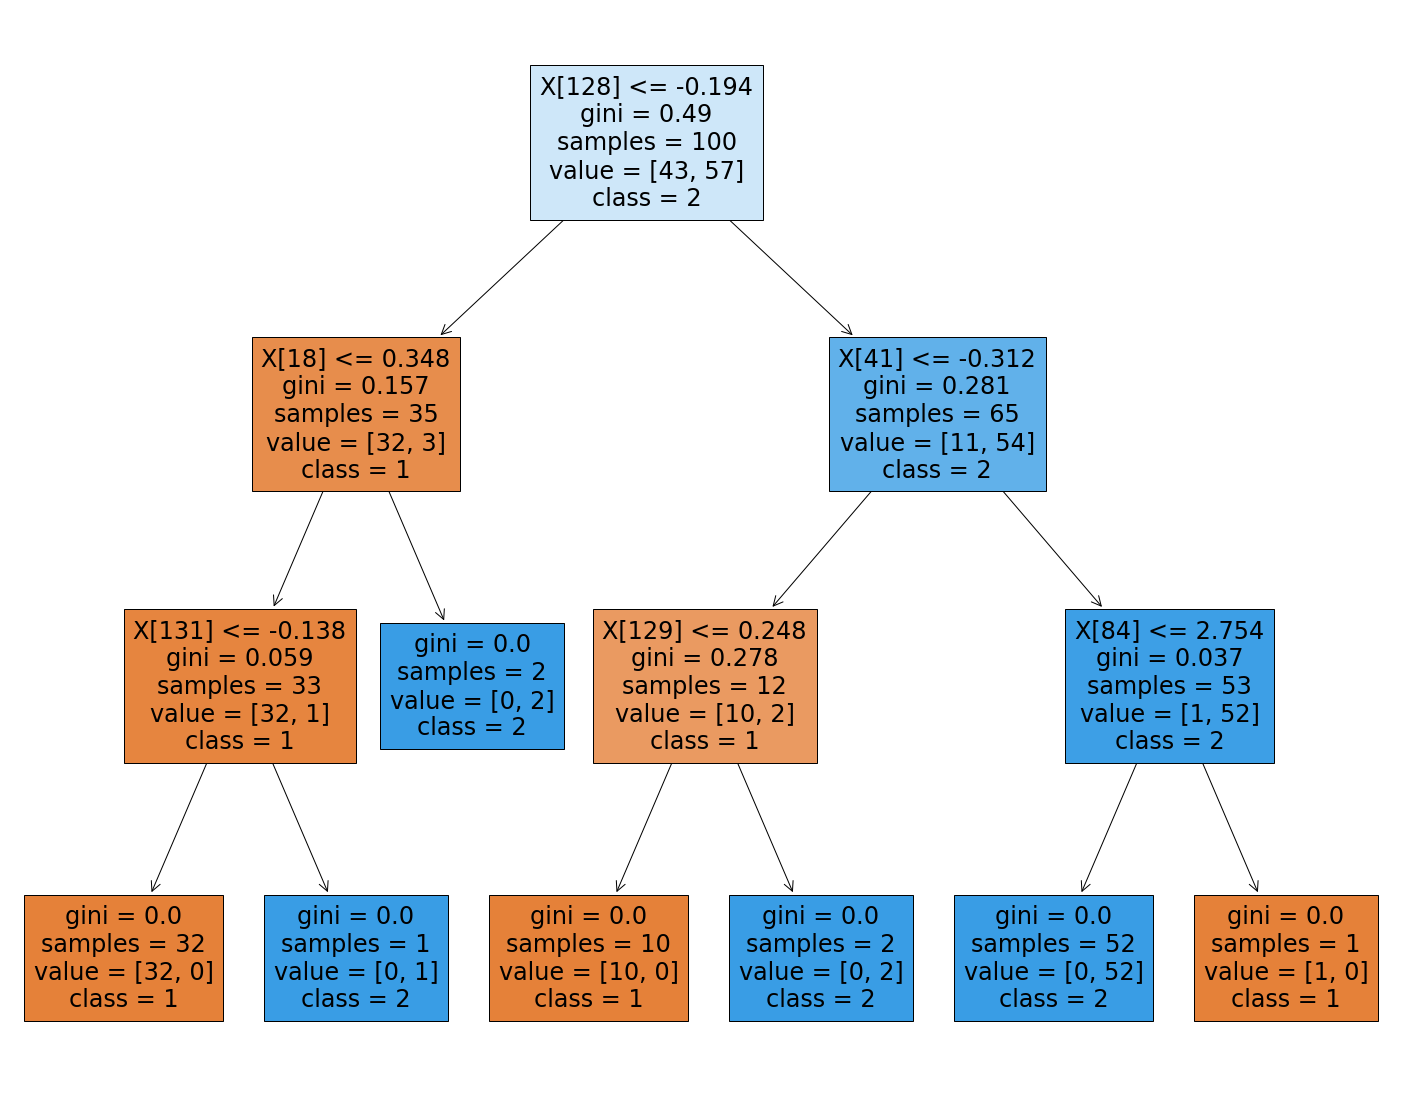

In [2]:

csv_file="ECGFiveDays_TEST" #accessing dataset
data=pd.read_csv(csv_file,header = None)
df3=data.loc[data[0] == 1]
df4=data.loc[data[0] == 2]
testy=data[0].values
testx=data.drop([0],axis=1).values

X = testx[:100,:]
y = testy[:100]
testxx=testx[100:150,:]
testxy=testy[100:150]
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   
                   class_names=['1','2'],
                   filled=True)


y_pred = model.predict(testxx)
print("Accuracy:",metrics.accuracy_score(testxy, y_pred))

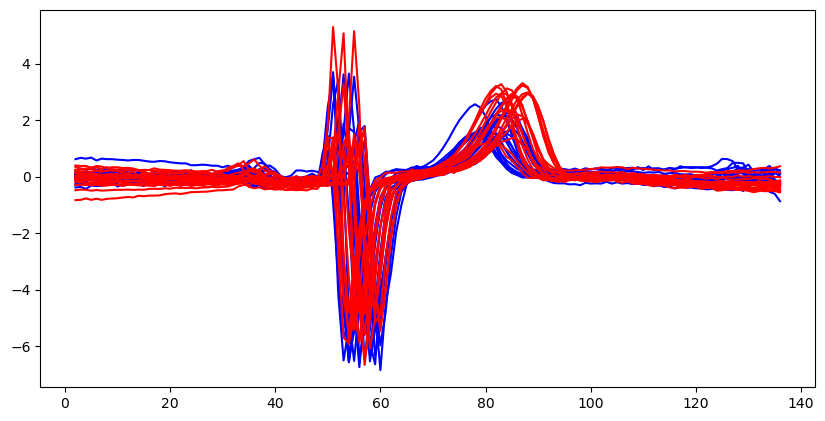

In [3]:
pyplot.figure(figsize=(10,5), dpi=100)
for i in range(1,20):
    pyplot.plot(df4.iloc[i,2:],color="Blue",label="class 2") 

for i in range(1,20):
    pyplot.plot(df3.iloc[i,2:],color="Red",label="class 1") 

## FordA

In [4]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


x_train, y_train = readucr("FordA_TRAIN.tsv")
x_test, y_test = readucr("FordA_TEST.tsv")


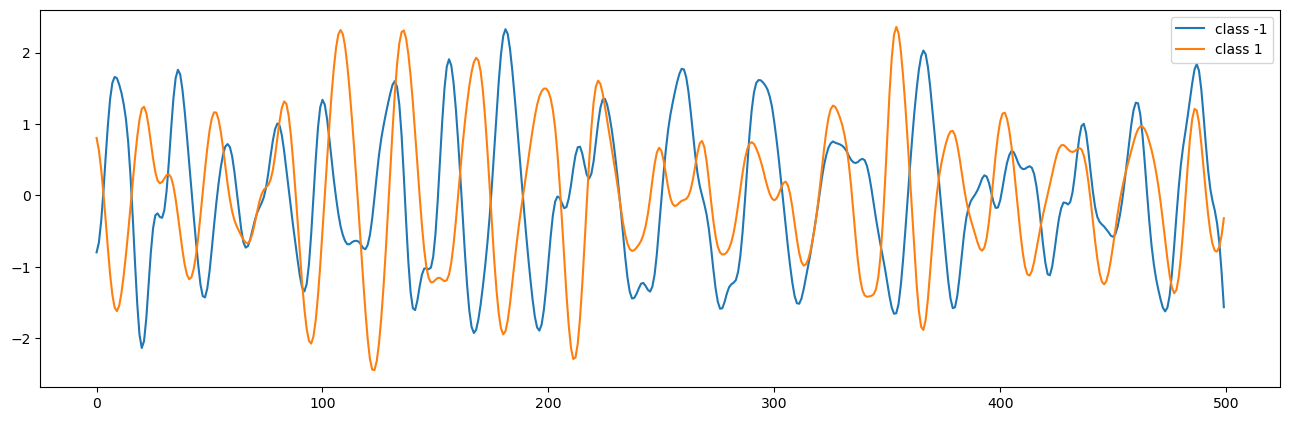

In [5]:
x_train=x_train[:50,:]
y_train=y_train[:50]
x_test=x_test[:50,:]
y_test=y_test[:50]
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure(figsize=(16,5), dpi=100)
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [6]:
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn import metrics
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
model = clf.fit(x_train, y_train)
text_representation = tree.export_text(clf)
print(text_representation)
y_pred = model.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

|--- feature_460 <= 0.42
|   |--- feature_4 <= 0.89
|   |   |--- feature_72 <= 0.21
|   |   |   |--- class: 1
|   |   |--- feature_72 >  0.21
|   |   |   |--- class: -1
|   |--- feature_4 >  0.89
|   |   |--- class: -1
|--- feature_460 >  0.42
|   |--- feature_135 <= 2.28
|   |   |--- class: -1
|   |--- feature_135 >  2.28
|   |   |--- class: 1

Accuracy: 0.6


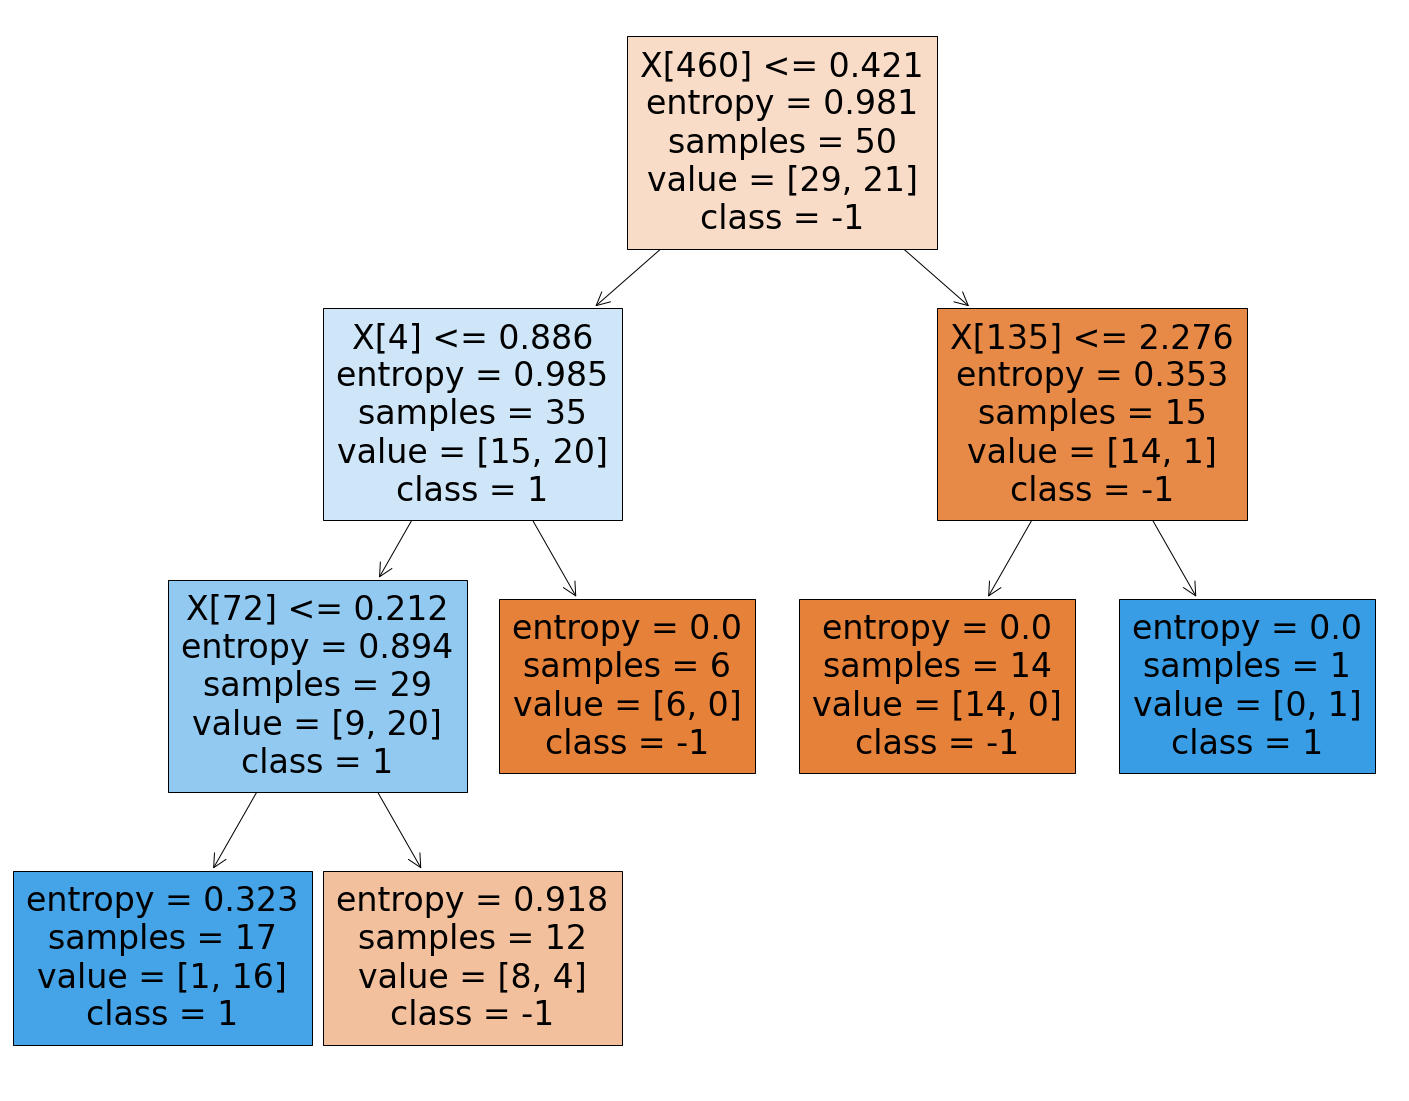

In [7]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf,   
                   class_names=['-1','1'],
                   filled=True)


## Plane time-series classsification

|--- feature_116 <= -0.50
|   |--- feature_73 <= -0.46
|   |   |--- class: 6
|   |--- feature_73 >  -0.46
|   |   |--- feature_92 <= 0.20
|   |   |   |--- feature_61 <= -0.50
|   |   |   |   |--- class: 2
|   |   |   |--- feature_61 >  -0.50
|   |   |   |   |--- feature_7 <= 0.85
|   |   |   |   |   |--- class: 5
|   |   |   |   |--- feature_7 >  0.85
|   |   |   |   |   |--- feature_124 <= -0.80
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_124 >  -0.80
|   |   |   |   |   |   |--- class: 7
|   |   |--- feature_92 >  0.20
|   |   |   |--- class: 3
|--- feature_116 >  -0.50
|   |--- class: 4

Accuracy: 0.76


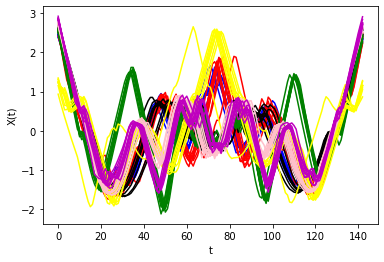

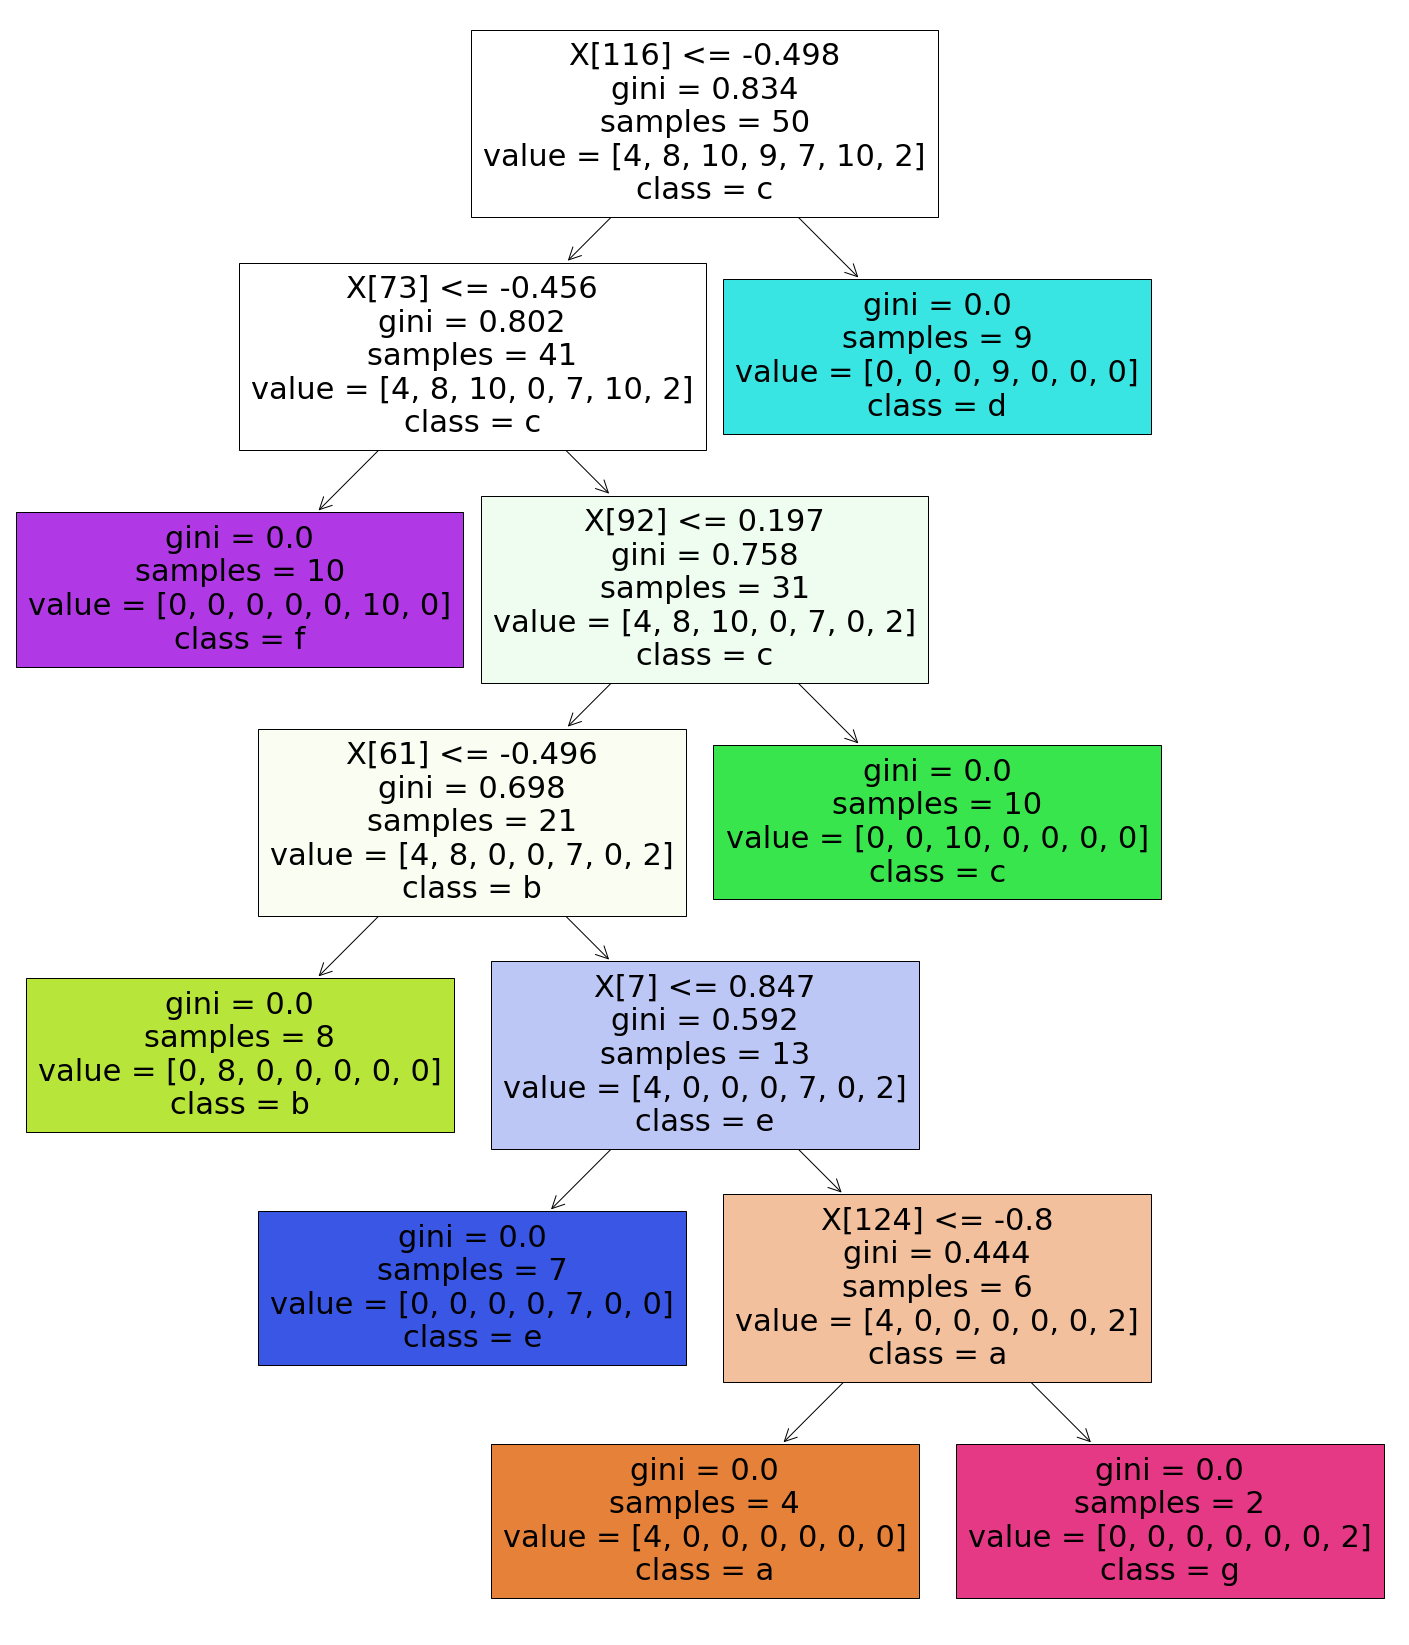

In [8]:
data=pd.read_csv("plane",header=None)
data[143]=(data[143].str.split(":"))
data.drop([143],axis=1)
li=list(data[143])
li1=[]
for i in li:
    li1.append(int(i[1]))
data[143]=li1

df1=data.loc[data[143] == 1]
df2=data.loc[data[143] == 2]
df3=data.loc[data[143] == 3]
df4=data.loc[data[143] == 4]
df5=data.loc[data[143] == 5]
df6=data.loc[data[143] == 6]
df7=data.loc[data[143] == 7]
data1=data[data[143]<=7]


for i in range(1,10):
    pyplot.plot(df1.iloc[i,:143],color="Blue",label="class 1") 
for i in range(1,10):
    pyplot.plot(df2.iloc[i,:143],color="Red",label="class 2") 
for i in range(1,10):
    pyplot.plot(df3.iloc[i,:143],color="k",label="class 3") 
for i in range(1,10):
    pyplot.plot(df4.iloc[i,:143],color="green",label="class 4") 
for i in range(1,10):
    pyplot.plot(df5.iloc[i,:143],color="yellow",label="class 5") 
for i in range(1,10):
    pyplot.plot(df6.iloc[i,:143],color="pink",label="class 6") 
for i in range(1,10):
    pyplot.plot(df7.iloc[i,:143],color="m",label="class 7") 

    
pyplot.xlabel("t")
pyplot.ylabel("X(t)")
testy=data1[143].values
testx=data1.drop([143],axis=1).values

X = testx[:50,:]
y = testy[:50]
testxx=testx[50:100,:]
testxy=testy[50:100]
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
text_representation = tree.export_text(clf)
print(text_representation)
fig = plt.figure(figsize=(25,30))
_ = tree.plot_tree(clf,   
                   class_names=['a', 'b', 'c', 'd', 'e', 'f', 'g'],
                   filled=True)


y_pred = clf.predict(testxx)
print("Accuracy:",metrics.accuracy_score(testxy, y_pred))

DATASETS :-

ECG Time series dataset:-https://github.com/qianlima-lab/TSN/tree/master/UCR_TS_Archive_2015/ECGFiveDays

Ford Motor Data:- https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/
http://www.j-wichard.de/publications/FordPaper.pdf

Plane data :-
 http://www.timeseriesclassification.com/description.php?Dataset=Plane

      4. UCR :-  https://www.cs.ucr.edu/~eamonn/time_series_data_2018/
	           http://www.timeseriesclassification.com/dataset.php


In [9]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")